D:\IDLE\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\IDLE\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "D:\IDLE\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "D:\IDLE\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\IDLE\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


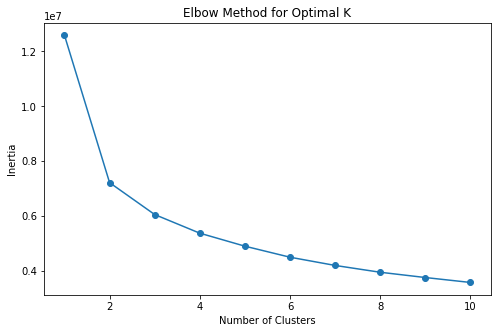

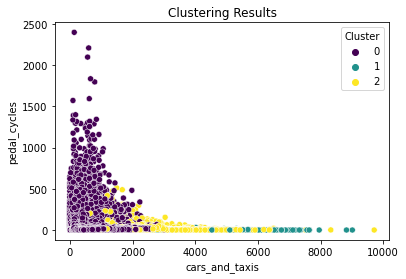

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,region_ons_code,local_authority_id,local_authority_name,...,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,all_HGVs,all_motor_vehicles,Cluster
0,51,N,2004,2004-05-21,7,1,South West,E12000009,1,Isles of Scilly,...,13,0,0,0,0,0,0.0,0.0,19.0,0
1,51,N,2004,2004-05-21,8,1,South West,E12000009,1,Isles of Scilly,...,13,7,7,0,0,0,0.0,14.0,44.0,0
2,51,N,2004,2004-05-21,9,1,South West,E12000009,1,Isles of Scilly,...,17,5,0,0,0,0,0.0,5.0,45.0,0
3,51,N,2004,2004-05-21,10,1,South West,E12000009,1,Isles of Scilly,...,4,4,0,0,0,0,0.0,4.0,41.0,0
4,51,N,2004,2004-05-21,11,1,South West,E12000009,1,Isles of Scilly,...,14,6,0,0,0,0,0.0,6.0,41.0,0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 读取Excel文件
df = pd.read_excel("D:\downloadinternet\dft_traffic_counts_raw_counts.xlsx", sheet_name='dft_traffic_counts_raw_counts')

# 选择数值型列进行聚类
numeric_columns = [
    'cars_and_taxis','pedal_cycles',
    'buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
    'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
    'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles'
]
data = df[numeric_columns]

# 处理缺失值（填充为列均值）
data = data.fillna(data.mean())

# 标准化数据
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 确定最佳聚类数 (肘部法则)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# 选择合适的K值（假设肘部法则选取 K=3）
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# 可视化聚类结果（取前两列数值数据进行散点图展示）
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Clustering Results')
plt.show()

# 显示带有聚类标签的数据
df.head()


In [3]:
distribution = df['Cluster'].value_counts()
print("Cluster Distribution:")
print(distribution)

Cluster Distribution:
0    823168
2    171662
1     53745
Name: Cluster, dtype: int64


In [4]:
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 6):  # 尝试 K=2 到 K=5
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_scaled)
    ch_score = calinski_harabasz_score(data_scaled, clusters)
    print(f'K={k}, Calinski-Harabasz Score: {ch_score:.2f}')

K=2, Calinski-Harabasz Score: 778025.03
K=3, Calinski-Harabasz Score: 563933.75
K=4, Calinski-Harabasz Score: 467352.80
K=5, Calinski-Harabasz Score: 409517.58


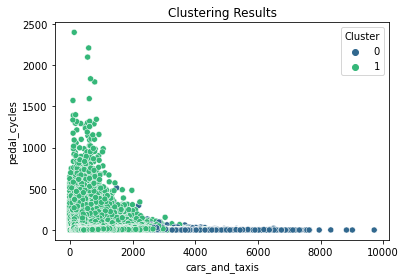

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,region_ons_code,local_authority_id,local_authority_name,...,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,all_HGVs,all_motor_vehicles,Cluster
0,51,N,2004,2004-05-21,7,1,South West,E12000009,1,Isles of Scilly,...,13,0,0,0,0,0,0.0,0.0,19.0,1
1,51,N,2004,2004-05-21,8,1,South West,E12000009,1,Isles of Scilly,...,13,7,7,0,0,0,0.0,14.0,44.0,1
2,51,N,2004,2004-05-21,9,1,South West,E12000009,1,Isles of Scilly,...,17,5,0,0,0,0,0.0,5.0,45.0,1
3,51,N,2004,2004-05-21,10,1,South West,E12000009,1,Isles of Scilly,...,4,4,0,0,0,0,0.0,4.0,41.0,1
4,51,N,2004,2004-05-21,11,1,South West,E12000009,1,Isles of Scilly,...,14,6,0,0,0,0,0.0,6.0,41.0,1


In [7]:
# 选择合适的K值（假设肘部法则选取 K=3）
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# 可视化聚类结果（取前两列数值数据进行散点图展示）
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Clustering Results')
plt.show()

# 显示带有聚类标签的数据
df.head()

In [8]:
distribution = df['Cluster'].value_counts()
print("Cluster Distribution:")
print(distribution)

Cluster Distribution:
1    906811
0    141764
Name: Cluster, dtype: int64


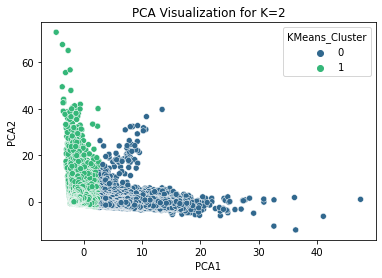

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('PCA Visualization for K=2')
plt.show()


D:\IDLE\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


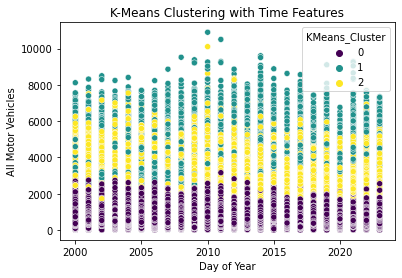

K-Means Cluster Distribution:
0    821674
2    172731
1     54170
Name: KMeans_Cluster, dtype: int64


,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,region_ons_code,local_authority_id,local_authority_name,...,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,all_HGVs,all_motor_vehicles,month,KMeans_Cluster
0,51,N,2004,2004-05-21,7,1,South West,E12000009,1,Isles of Scilly,...,0,0,0,0,0,0.0,0.0,19.0,5,0
1,51,N,2004,2004-05-21,8,1,South West,E12000009,1,Isles of Scilly,...,7,7,0,0,0,0.0,14.0,44.0,5,0
2,51,N,2004,2004-05-21,9,1,South West,E12000009,1,Isles of Scilly,...,5,0,0,0,0,0.0,5.0,45.0,5,0
3,51,N,2004,2004-05-21,10,1,South West,E12000009,1,Isles of Scilly,...,4,0,0,0,0,0.0,4.0,41.0,5,0
4,51,N,2004,2004-05-21,11,1,South West,E12000009,1,Isles of Scilly,...,6,0,0,0,0,0.0,6.0,41.0,5,0


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 读取Excel文件
df = pd.read_excel("D:\downloadinternet\dft_traffic_counts_raw_counts.xlsx", sheet_name='dft_traffic_counts_raw_counts')

# 选择数值型列进行聚类，并引入时间特征
df['count_date'] = pd.to_datetime(df['count_date'])  # 转换为日期格式
df['year'] = df['count_date'].dt.year  # 提取年份
df['month'] = df['count_date'].dt.month  # 提取月份


# 重新选择数值型列
data_columns = [
     'cars_and_taxis','pedal_cycles',
    'buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
    'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
    'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles',
    'year', 'month'
]
data = df[data_columns]

# 处理缺失值（填充为列均值）
data = data.fillna(data.mean())

# 标准化数据
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 运行 K-Means 聚类
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# 可视化 K-Means 结果
sns.scatterplot(x=df['year'], y=df['all_motor_vehicles'], hue=df['KMeans_Cluster'], palette='viridis')
plt.xlabel('Day of Year')
plt.ylabel('All Motor Vehicles')
plt.title('K-Means Clustering with Time Features')
plt.show()

# 统计各簇数量
print("K-Means Cluster Distribution:")
print(df['KMeans_Cluster'].value_counts())

# 显示带有 KMeans 聚类标签的数据
df.head()


In [23]:
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 5):  # 尝试 K=2 到 K=5
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_scaled)
    ch_score = calinski_harabasz_score(data_scaled, clusters)
    print(f'K={k}, Calinski-Harabasz Score: {ch_score:.2f}')

K=2, Calinski-Harabasz Score: 603739.91
K=3, Calinski-Harabasz Score: 420295.29
K=4, Calinski-Harabasz Score: 338380.34


CH Score after adding time features: 420295.29


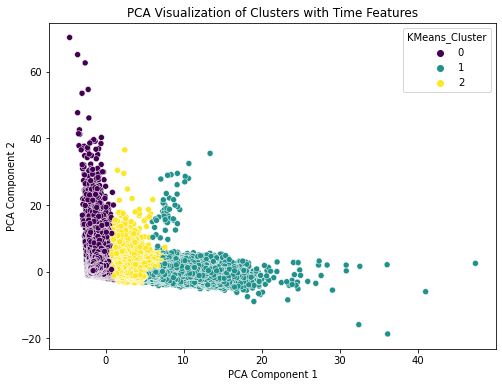

In [24]:
och_score = calinski_harabasz_score(data_scaled, df['KMeans_Cluster'])
print(f'CH Score after adding time features: {och_score:.2f}')

# 进行 PCA 降维并可视化
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df['PCA1'] = data_pca[:, 0]
df['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Clusters with Time Features')
plt.show()

❌ 时间变量未明显提升聚类效果
CH 指数下降，说明时间特征 可能没有增加有效信息，反而让 K-Means 的簇变得更难区分。
从图像来看，K-Means 仍然主要依据流量大小聚类，而不是时间模式。
👉 可能的解释

时间特征（year, month, day）可能不如 is_weekend、hour 这样更细粒度的时间特征有用。
如果流量模式本身已经受时间影响，那么 K-Means 可能已经通过流量特征隐式地学习到了时间信息。
K-Means 更擅长基于数值型特征（如流量）来找聚类，而时间信息本质上可能需要另一种处理方式（如时序分析）